In [90]:
import pandas as pd
import numpy as np

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [91]:
# Read in data into a dataframe
data = pd.read_csv('results/1624319954.6473336.csv')
data = data.replace({'error': 0})
data['compare'] = data['compare'].astype(float)
data['compare2'] = data['compare2'].astype(float)
data = data[data['compare2'] > 0]
# data = pd.concat([chunk[chunk[0] == 'error'] for chunk in data])

# Display top of dataframe
data.head()

i       fileName  tresh  maxVal        xO        yO  iterationsO  \
72    72  vagabond1.png    173      47  1.975375  0.758709            0   
94    94  vagabond1.png    205     173  1.573167  1.553963            0   
109  109  vagabond1.png     99     106  0.282279  0.797854            3   
124  124  vagabond1.png     74      37  1.289161  0.192519            0   
148  148  vagabond1.png     77     192  0.249052  1.941071            0   

     shapeO        xC        yC  iterationsC  shapeC  filterRects   compare  \
72        0  0.474451  1.725438            1       1            9  0.983691   
94        1  0.048317  0.115899            2       0            7  0.976387   
109       0  1.600397  0.964928            0       0            6  0.975737   
124       1  0.867806  0.062138            0       1            4  0.975737   
148       1  1.265865  1.786180            0       1            6  0.975737   

     compare2  
72   0.995923  
94   0.993999  
109  0.993821  
124  0.993821  
148  0.993821

In [92]:
# Statistics for each column
data.describe()

i        tresh       maxVal           xO           yO  \
count  1367.000000  1367.000000  1367.000000  1367.000000  1367.000000   
mean   5162.194587    94.897586   128.773226     0.795403     0.937248   
std    2830.115612    63.901116    73.309118     0.584862     0.552828   
min       9.000000     0.000000     1.000000     0.015320     0.069754   
25%    2739.500000    38.500000    66.000000     0.274835     0.459457   
50%    5204.000000    93.000000   129.000000     0.660441     0.884856   
75%    7648.000000   128.500000   194.000000     1.281690     1.392599   
max    9995.000000   254.000000   254.000000     1.996671     1.999893   

       iterationsO       shapeO           xC           yC  iterationsC  \
count  1367.000000  1367.000000  1367.000000  1367.000000  1367.000000   
mean      2.144843     0.552304     0.801181     0.934890     2.339429   
std       2.497337     0.497439     0.590470     0.558771     2.648034   
min       0.000000     0.000000     0.014968     0.060579     0.000000   
25%       0.000000     0.000000     0.277134     0.452328     0.000000   
50%       1.000000     1.000000     0.658863     0.871900     1.000000   
75%       3.000000     1.000000     1.279302     1.384011     4.000000   
max       9.000000     1.000000     1.998418     1.999073     9.000000   

            shapeC  filterRects      compare     compare2  
count  1367.000000  1367.000000  1367.000000  1367.000000  
mean      0.529627     5.160936     0.868900     0.902072  
std       0.499304     2.213130     0.115962     0.085802  
min       0.000000     2.000000     0.339936     0.746000  
25%       0.000000     3.000000     0.829198     0.812330  
50%       1.000000     5.000000     0.857203     0.888426  
75%       1.000000     7.000000     0.965799     0.993821  
max       1.000000     9.000000     0.992648     0.998271

In [93]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 72 to 69995
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   i            1367 non-null   int64  
 1   fileName     1367 non-null   object 
 2   tresh        1367 non-null   int64  
 3   maxVal       1367 non-null   int64  
 4   xO           1367 non-null   float64
 5   yO           1367 non-null   float64
 6   iterationsO  1367 non-null   int64  
 7   shapeO       1367 non-null   int64  
 8   xC           1367 non-null   float64
 9   yC           1367 non-null   float64
 10  iterationsC  1367 non-null   int64  
 11  shapeC       1367 non-null   int64  
 12  filterRects  1367 non-null   int64  
 13  compare      1367 non-null   float64
 14  compare2     1367 non-null   float64
dtypes: float64(6), int64(8), object(1)
memory usage: 170.9+ KB


In [94]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [95]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

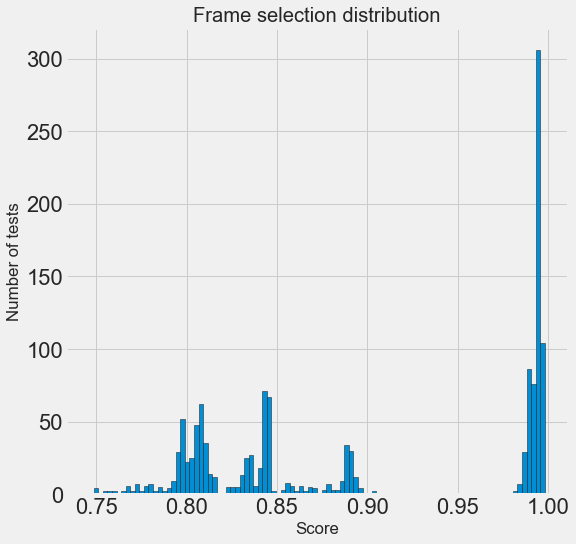

In [96]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['compare2'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of tests');
plt.title('Frame selection distribution');

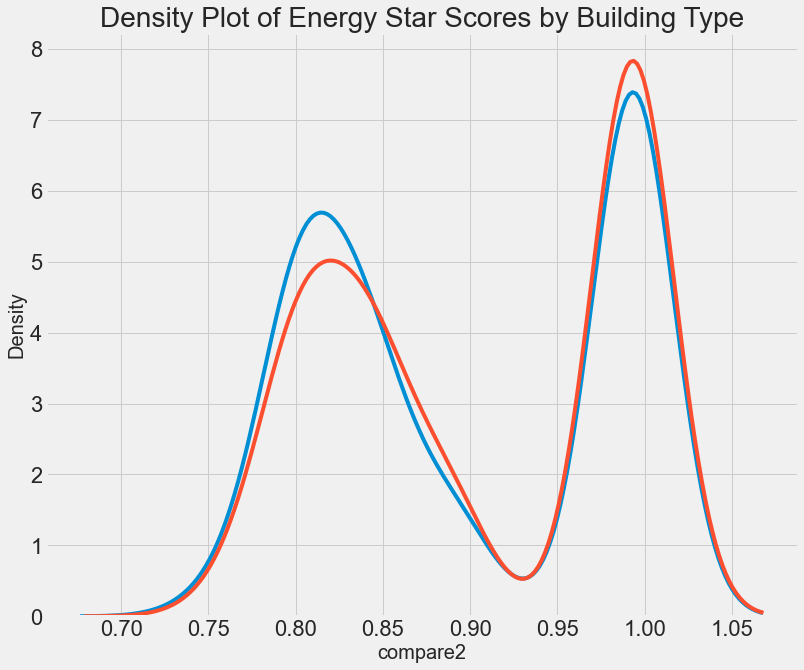

In [97]:
# Plot of distribution of scores for building categories
figsize(12, 10)

shapes = ['MORPH_RECT', 'MORPH_CROSS', 'MORPH_ELLIPSE']

# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['compare2'])
types = types['shapeC'].value_counts()
types = list(types[types.values > 100].index)



# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['shapeC'] == b_type]

    # Density plot of Energy Star scores
    sns.kdeplot(subset['compare2'].dropna(),
               label = shapes[b_type], shade = False, alpha = 0.8);

# label the plot
plt.xlabel('compare2', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [98]:
# Find all correlations and sort
correlations_data = data.corr()['compare2'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

iterationsC   -0.448294
iterationsO   -0.407643
xO            -0.184506
xC            -0.165883
shapeC        -0.039713
shapeO        -0.034771
maxVal        -0.030784
i              0.004737
yO             0.025160
filterRects    0.030856
yC             0.103067
tresh          0.344142
compare        0.627305
compare2       1.000000
Name: compare2, dtype: float64 

iterationsC   -0.448294
iterationsO   -0.407643
xO            -0.184506
xC            -0.165883
shapeC        -0.039713
shapeO        -0.034771
maxVal        -0.030784
i              0.004737
yO             0.025160
filterRects    0.030856
yC             0.103067
tresh          0.344142
compare        0.627305
compare2       1.000000
Name: compare2, dtype: float64


/Users/timur/.conda/envs/pythonProject2/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timur/.conda/envs/pythonProject2/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


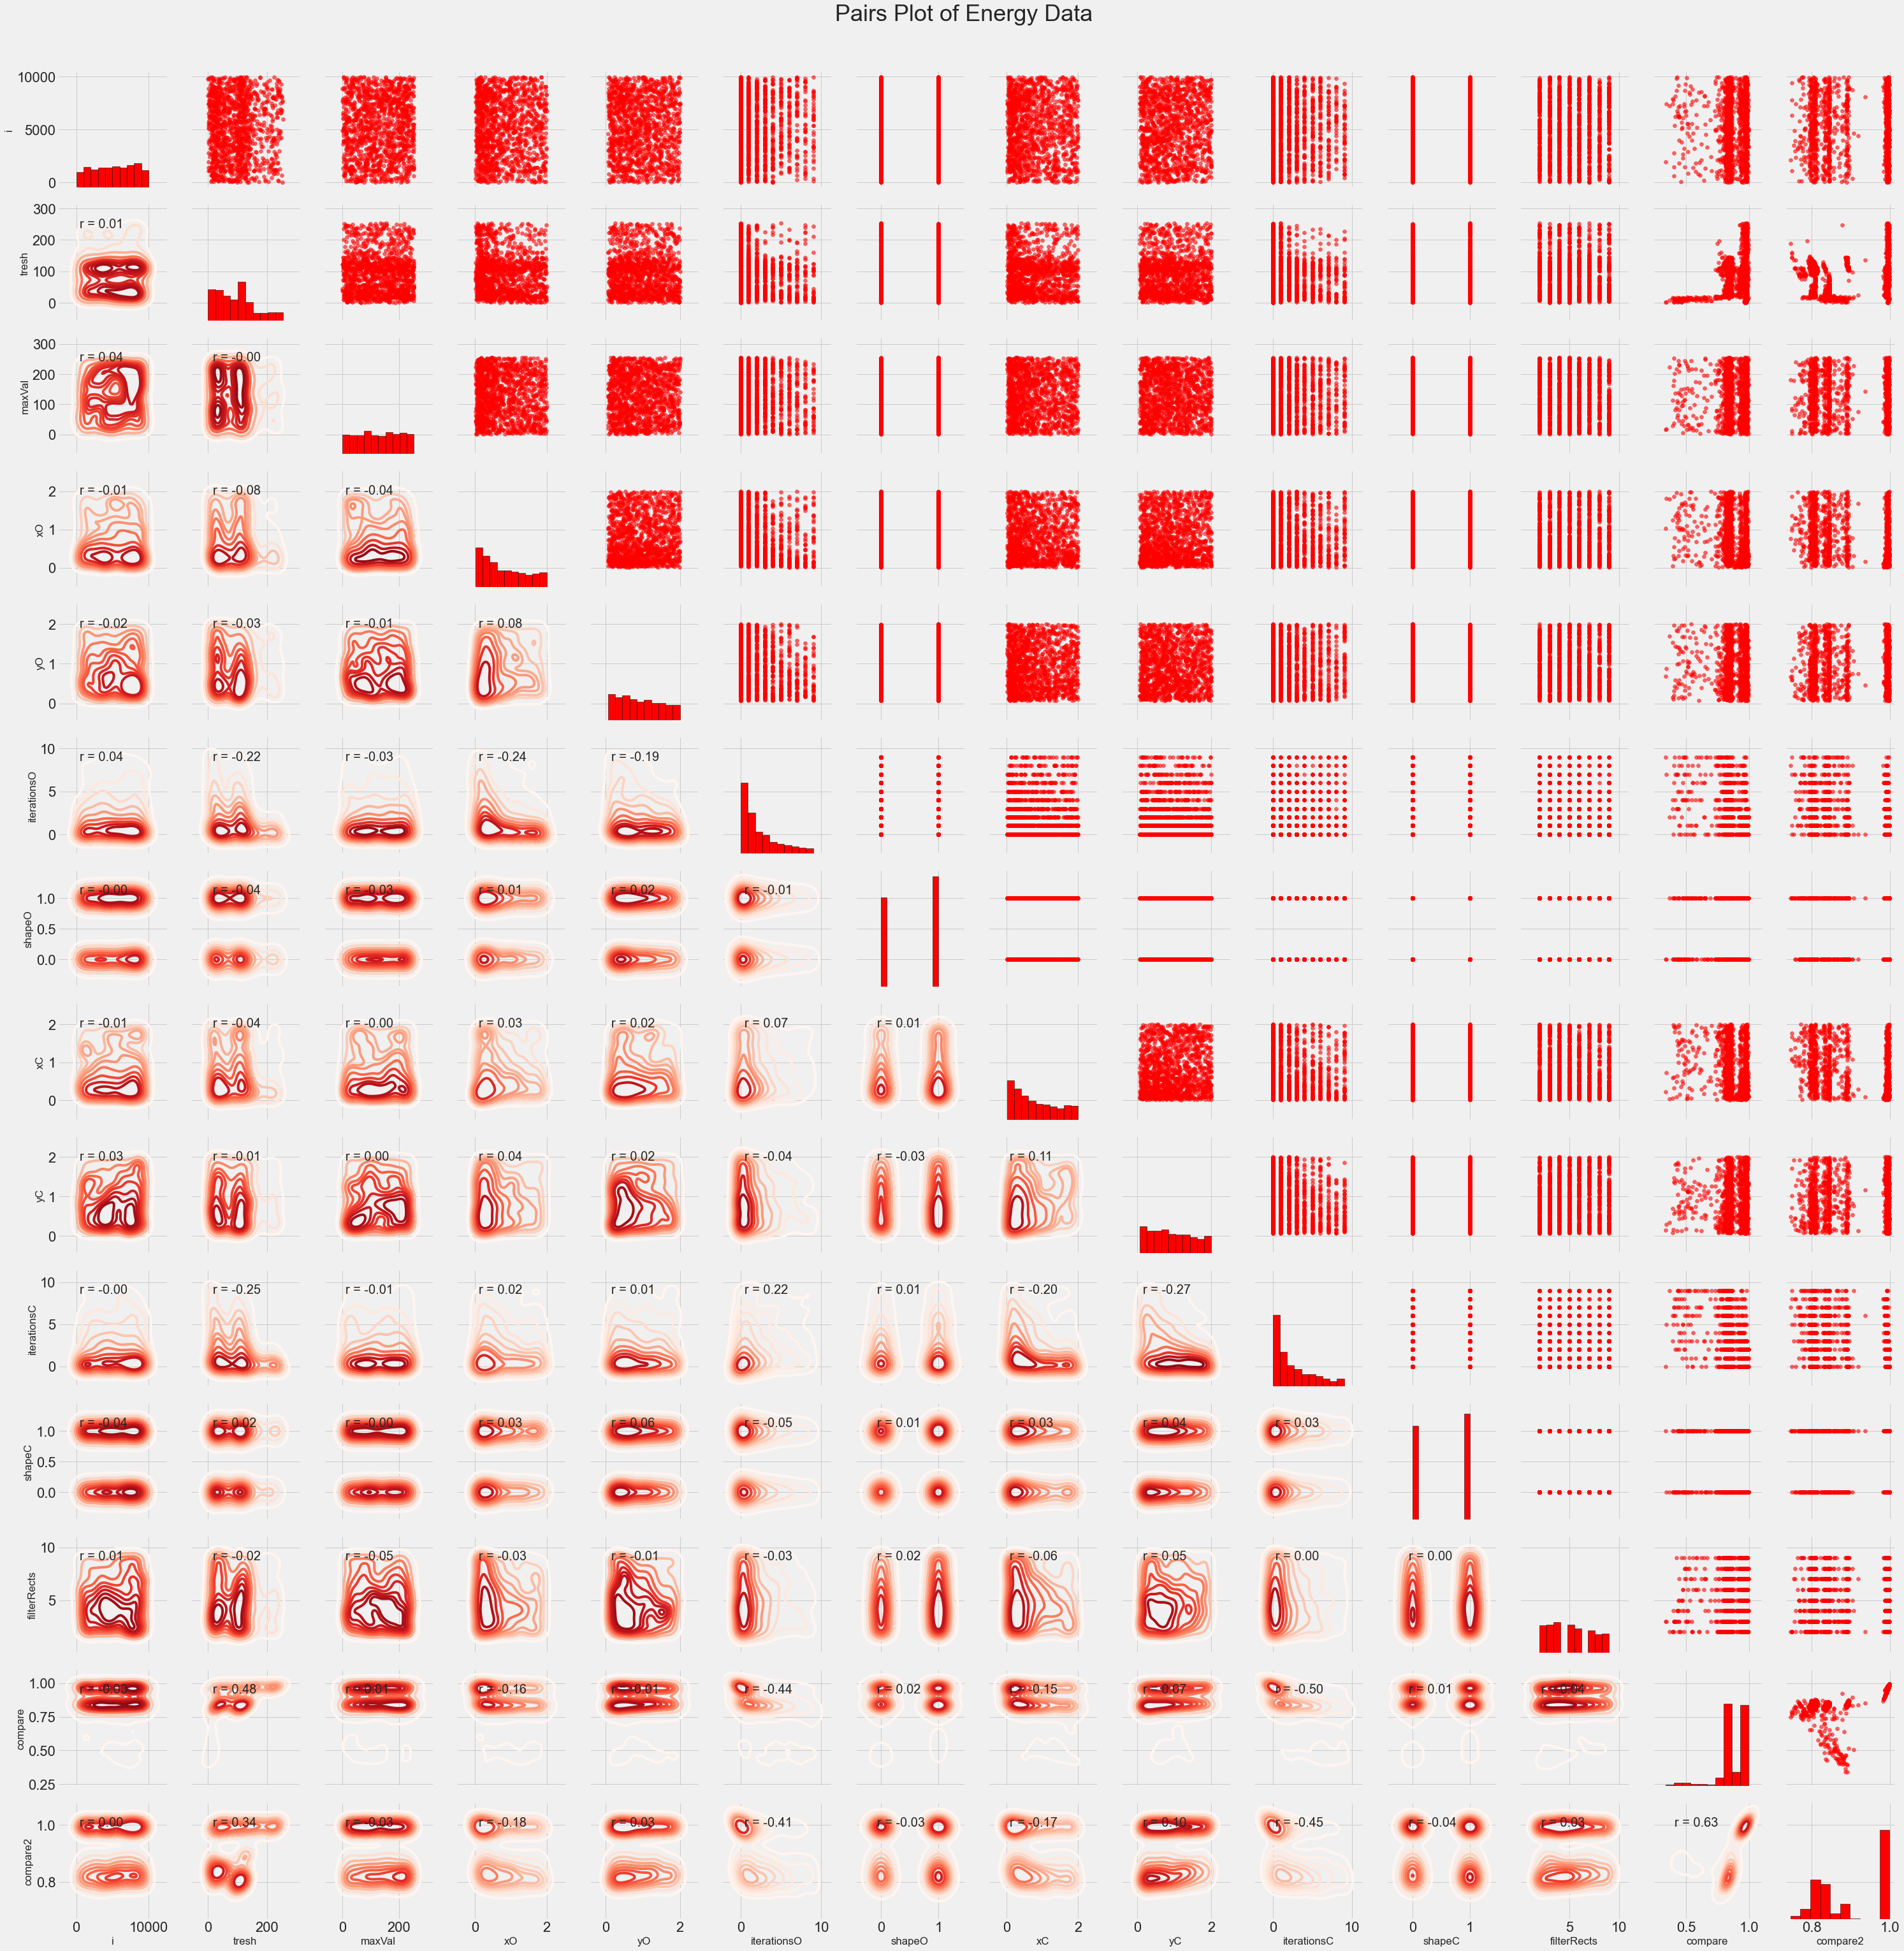

In [99]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['fileName']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['compare2'])

# Extract the columns to plot
plot_data = features[['i', 'tresh', 'maxVal',
                     'xO', 'yO', 'iterationsO', 'shapeO',
                     'xC', 'yC', 'iterationsC', 'shapeC',
                     'filterRects',
                     'compare', 'compare2']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);
